In [854]:
import os
os.chdir("C:\\Users\\Shankii\\Desktop\\kaglle\\loan_prediction")

In [855]:
import pandas as pd
import numpy as np
import math
import quandl
import scipy
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
from scipy.stats import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import binarize
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [856]:
idtrain=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
idtrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [857]:
idtrain.drop('Loan_ID',axis=1,inplace=True)
idtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [858]:
idtrain.describe(include='O')
### will show the columns which are object types

## so in gender col
## male has appeared 489 times

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [859]:
idtrain.describe()

## credit_history seems to have just 2 values
## 0 and 1

## since only 2 values
## lets convert that into categorical cols

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [860]:
idtrain['Credit_History']=idtrain['Credit_History'].astype('O')

idtrain.describe(include='O')

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,564.0,614,614
unique,2,2,4,2,2,2.0,3,2
top,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,489,398,345,480,500,475.0,233,422


In [861]:
## lets see if any duplicated values are there or not in the dataset

idtrain.duplicated().any()


## no duplicated values

False

In [862]:
## lets fill the na values in the dataset

idtrain.isnull().sum()

## loan amount with the mean of the values
## credit history with maximum apperaing entry

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [863]:
idtrain['LoanAmount']=idtrain['LoanAmount'].fillna(idtrain['LoanAmount'].mean())

idtrain['Credit_History']=idtrain['Credit_History'].fillna(idtrain['Credit_History'].median())

In [864]:
## lets fill the NA values the value coming above them

idtrain=idtrain.fillna(method='bfill')

## lets not remove the null values from data
## since it may lead to removal of valuation info from dataset

idtrain.isnull().sum()

## all the NA values are been taken care of

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Loan_Status,N,Y
Gender,,
Female,37,76
Male,155,346


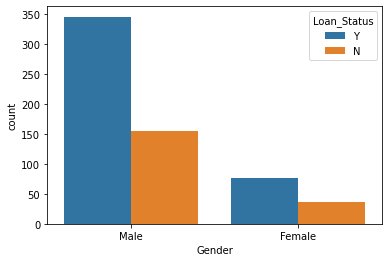

In [865]:
## lets see the data using various visualizations
## loan status vs gender

sns.countplot(idtrain['Gender'],hue=idtrain['Loan_Status'])


## using crosstab table, lets see the tabular computation of gender vs loan approval status

pd.crosstab(index=idtrain['Gender'],columns=idtrain['Loan_Status'])


## from the table
## males have higher chances of getting the loan approved

Loan_Status       N           Y     
Gender       Female Male Female Male
Education                           
Graduate         31  109     62  278
Not Graduate      6   46     14   68

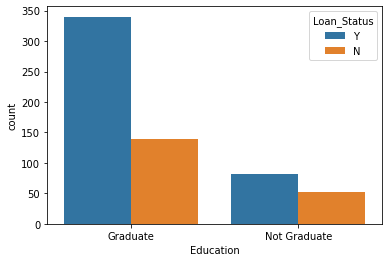

In [866]:
## Education vs loan approval

sns.countplot(idtrain['Education'],hue=idtrain['Loan_Status'])


## using crosstab table, lets see the tabular computation of education vs loan approval status

pd.crosstab(index=idtrain['Education'],columns=[idtrain['Loan_Status'],idtrain['Gender']])



## from table
## graduates with gender as male have more chances of getting loan

Loan_Status,N,Y
Self_Employed,,
No,164,364
Yes,28,58


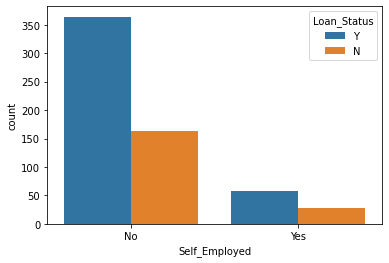

In [867]:
## mode of employment vs loan approval

sns.countplot(idtrain['Self_Employed'],hue=idtrain['Loan_Status'])


## using crosstab table, lets see the tabular computation of self_employed vs loan approval status

pd.crosstab(index=idtrain['Self_Employed'],columns=idtrain['Loan_Status'])



## not self employed has more chances of getting the loan

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


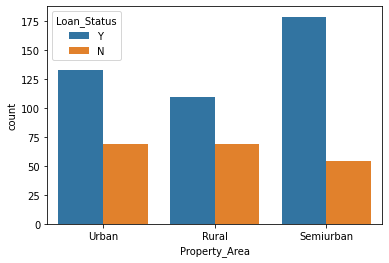

In [868]:
## property vs loan
sns.countplot(idtrain['Property_Area'],hue=idtrain['Loan_Status'])


## using crosstab table, lets see the tabular computation of property_area vs loan approval status

pd.crosstab(index=idtrain['Property_Area'],columns=idtrain['Loan_Status'])


## semiurban has most chances of getting it

In [869]:
k=idtrain.columns

for i in k:
    print(idtrain[i].value_counts(),'\n\n')

Male      501
Female    113
Name: Gender, dtype: int64 


Yes    399
No     215
Name: Married, dtype: int64 


0     354
2     105
1     104
3+     51
Name: Dependents, dtype: int64 


Graduate        480
Not Graduate    134
Name: Education, dtype: int64 


No     528
Yes     86
Name: Self_Employed, dtype: int64 


2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64 


0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64 


146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
570.000000     1
300.000000     1
376.000000     1
117.000000     1
311.000000     1
Name: LoanAmount, Length: 204, dtype: int64 


360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
1

In [870]:
## replace
## gender : male as 1 : female as 0
## loan_status : Y as 1 : N as 0
## married : yes as 1 ; no as 0
## education : graduate as 1 ; not graduate as 0
## SElf_employed : yes as 1 ; no as 0
## propert : urban as 2 ; rural as 0; semiurban as 1


## dependents as object type
## so we have to convert it into numeric so that 3+ can be written as 3


## dependents : 0 as 0, 1 as 1, 2 as 2 , 3+ as 3


idtrain['Gender']=idtrain['Gender'].map({'Male':1,'Female':0})
idtrain['Loan_Status']=idtrain['Loan_Status'].map({'Y':1,'N':0})
idtrain['Married']=idtrain['Married'].map({'Yes':1,'No':0})
idtrain['Education']=idtrain['Education'].map({'Graduate':1,'Not Graduate':0})
idtrain['Self_Employed']=idtrain['Self_Employed'].map({'Yes':1,'No':0})
idtrain['Property_Area']=idtrain['Property_Area'].map({'Urban':2,'Rural':0,'Semiurban':1})
idtrain['Dependents']=idtrain['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})


In [871]:
## lets see whether the above code has worked properly or not

k=idtrain.columns

for i in k:
    print(idtrain[i].value_counts(),'\n\n')
    
## it worked just fine    

1    501
0    113
Name: Gender, dtype: int64 


1    399
0    215
Name: Married, dtype: int64 


0    354
2    105
1    104
3     51
Name: Dependents, dtype: int64 


1    480
0    134
Name: Education, dtype: int64 


0    528
1     86
Name: Self_Employed, dtype: int64 


2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64 


0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64 


146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
570.000000     1
300.000000     1
376.000000     1
117.000000     1
311.000000     1
Name: LoanAmount, Length: 204, dtype: int64 


360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0  

In [872]:
idtrain.info()
## all cols to int or float type
## no null values

## now we can go with variohs algos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


# HEATMAP

Text(0.5, 1.0, 'heatmap for seeing the corelation between the variables')

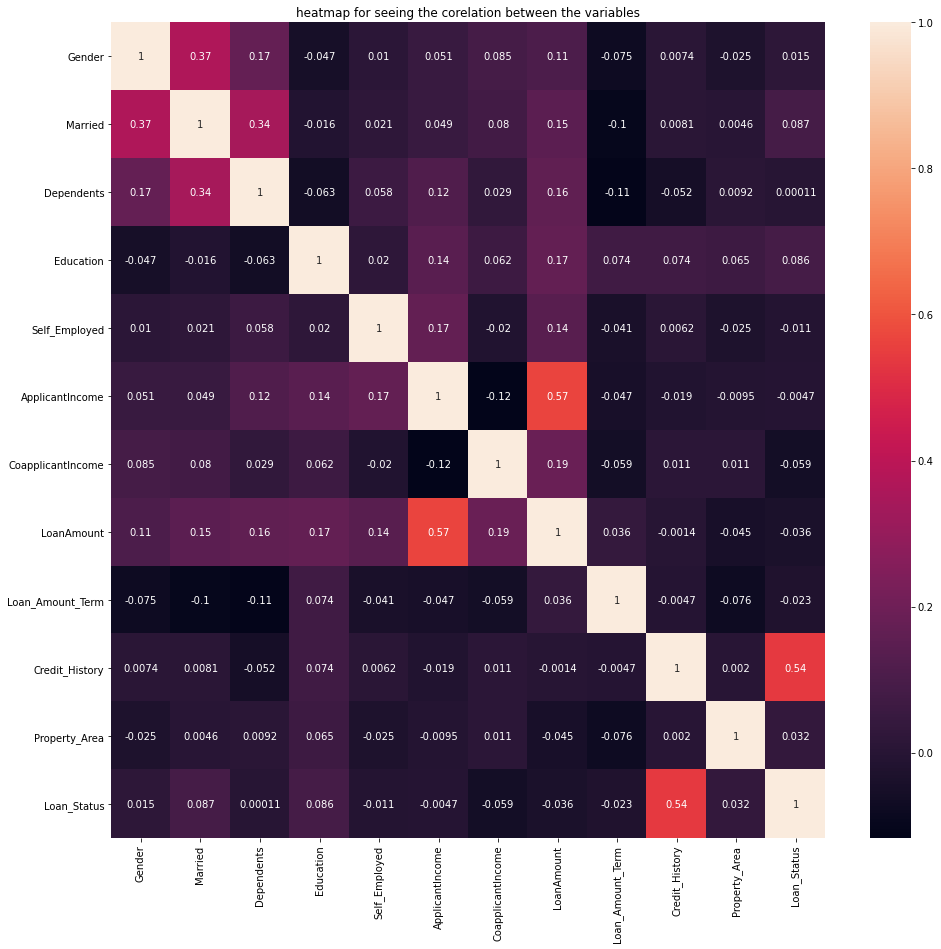

In [873]:
## lets go first with finding out the relations between the various variables with loan approval

plt.figure(figsize=(16,15))
sns.heatmap(idtrain.corr(),annot=True)
plt.title('heatmap for seeing the corelation between the variables')

In [874]:
## from heatmap:
## loan status is heavily dependent on credit history

In [875]:
x=idtrain.drop('Loan_Status',axis=1)
y=idtrain['Loan_Status']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=22)

# LOGISTIC REGRESSION

In [876]:
## since we have to only predict 1 and 0
## we can use logistic reg

lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred1=lg.predict(xtest)

print('accuracy is ', accuracy_score(ypred1,ytest))

accuracy is  0.7513513513513513


# SUPPORT VECTOR MACHINE

In [877]:
model=SVC()
model.fit(xtrain,ytrain)
ypred2=model.predict(xtest)

print('accuracy is ', accuracy_score(ypred2,ytest))

accuracy is  0.7189189189189189


# DECISION TREE

In [878]:
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred3=model.predict(xtest)

print('accuracy is ', accuracy_score(ypred3,ytest))

accuracy is  0.6378378378378379


# KNN

In [879]:
model=KNeighborsClassifier()
model.fit(xtrain,ytrain)
ypred4=model.predict(xtest)

print('accuracy is ', accuracy_score(ypred4,ytest))

accuracy is  0.6756756756756757


In [880]:
## as of now:
## logistic regression seems to be better model
## but lets improve our model now

In [881]:
## lets improve the model using feature engineering

Text(0.5, 1.0, 'heatmap for seeing the corelation between the variables')

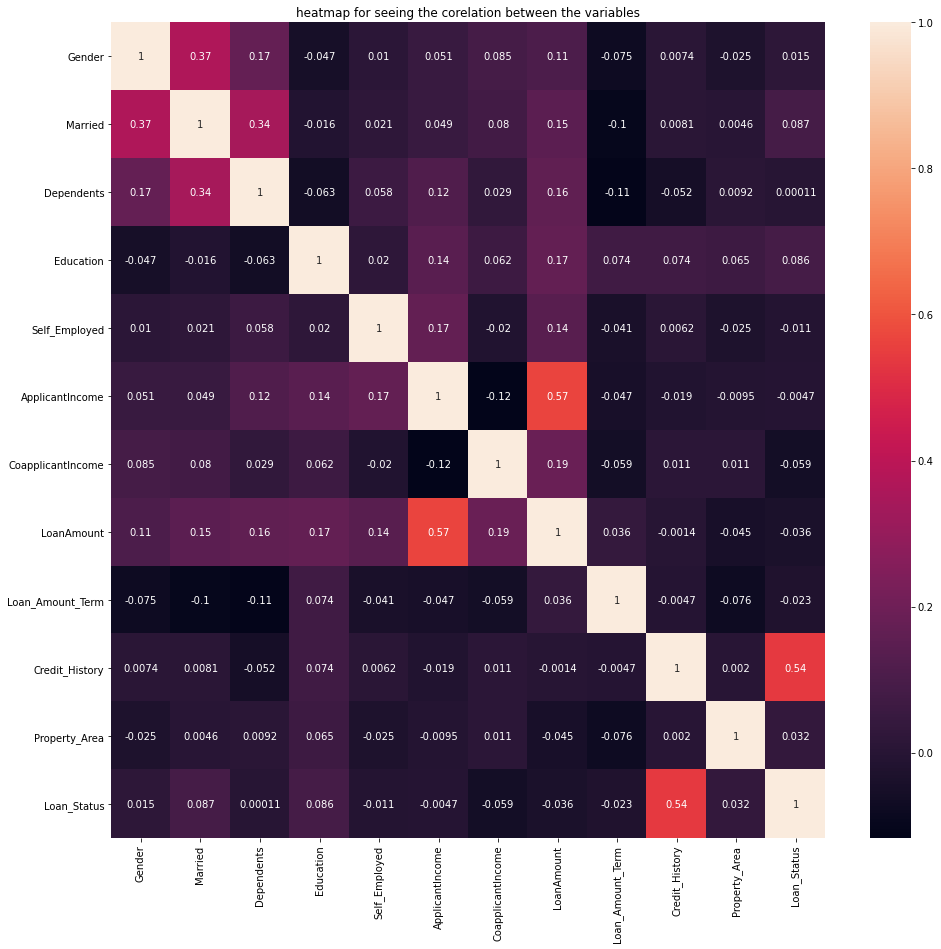

In [882]:
## lets go first with finding out the relations between the various variables with loan approval

plt.figure(figsize=(16,15))
sns.heatmap(idtrain.corr(),annot=True)
plt.title('heatmap for seeing the corelation between the variables')

In [883]:
xtrain['col1']=xtrain['CoapplicantIncome'] + xtrain['ApplicantIncome']
xtrain['col2']=xtrain['LoanAmount']*xtrain['Loan_Amount_Term']

<ipython-input-883-5c7b02fa070f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['col1']=xtrain['CoapplicantIncome'] + xtrain['ApplicantIncome']
<ipython-input-883-5c7b02fa070f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['col2']=xtrain['LoanAmount']*xtrain['Loan_Amount_Term']


In [884]:
## lets drop the cols used above

xtrain.drop(['CoapplicantIncome','ApplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1,inplace=True)

C:\Users\Shankii\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [885]:
newdata=pd.concat([xtrain,ytrain],axis=1)

Text(0.5, 1.0, 'heatmap for seeing the corelation between the variables')

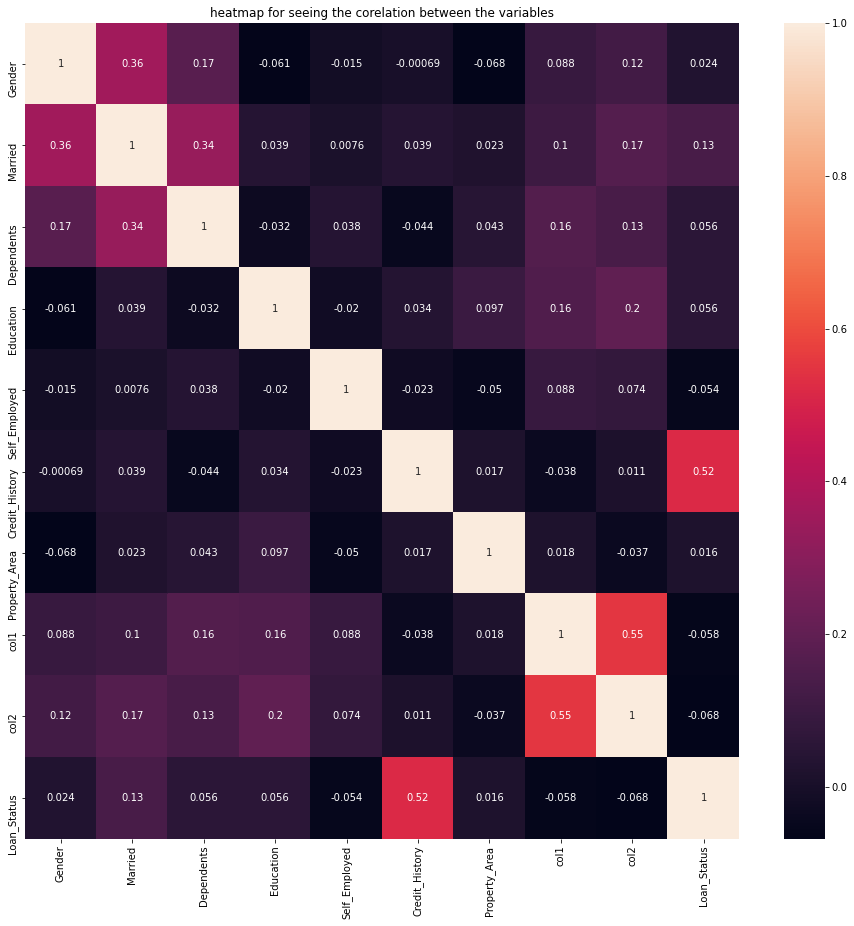

In [886]:
## lets go first with finding out the relations between the various variables with loan approval

plt.figure(figsize=(16,15))
sns.heatmap(newdata.corr(),annot=True)
plt.title('heatmap for seeing the corelation between the variables')

In [887]:
xtest['col1']=xtest['CoapplicantIncome'] + xtest['ApplicantIncome']
xtest['col2']=xtest['LoanAmount']*xtest['Loan_Amount_Term']

## lets drop the cols used above

xtest.drop(['CoapplicantIncome','ApplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1,inplace=True)

<ipython-input-887-22f25f005924>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['col1']=xtest['CoapplicantIncome'] + xtest['ApplicantIncome']
<ipython-input-887-22f25f005924>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['col2']=xtest['LoanAmount']*xtest['Loan_Amount_Term']


# LOGISTIC REGRESSION

In [888]:
## since we have to only predict 1 and 0
## we can use logistic reg

lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred1=lg.predict(xtest)

print('accuracy is ', accuracy_score(ypred1,ytest))

accuracy is  0.7189189189189189


# SUPPORT VECTOR MACHINE

In [889]:
model=SVC()
model.fit(xtrain,ytrain)
ypred2=model.predict(xtest)

print('accuracy is ', accuracy_score(ypred2,ytest))

accuracy is  0.7189189189189189


# DECISION TREE 

In [890]:
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred3=model.predict(xtest)

print('accuracy is ', accuracy_score(ypred3,ytest))

accuracy is  0.7081081081081081


# KNN

In [891]:
model=KNeighborsClassifier()
model.fit(xtrain,ytrain)
ypred4=model.predict(xtest)

print('accuracy is ', accuracy_score(ypred4,ytest))

accuracy is  0.7027027027027027


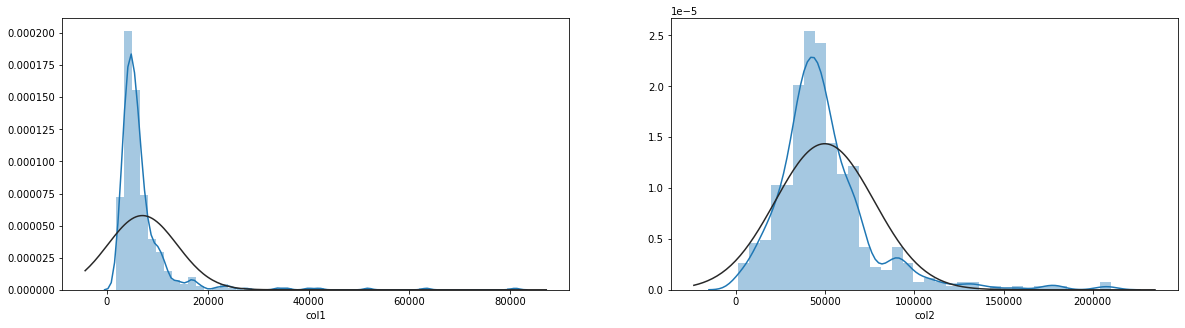

In [892]:
from scipy.stats import norm

fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.distplot(xtrain['col1'],ax=ax[0],fit=norm)
sns.distplot(xtrain['col2'],fit=norm)


## both the columns doesnt follow normal distribution
## lets make it logarithmic

In [893]:
xtrain['col1']=np.log(xtrain['col1'])
xtrain['col2']=np.log(xtrain['col2'])
xtest['col1']=np.log(xtest['col1'])
xtest['col2']=np.log(xtest['col2'])

<ipython-input-893-826d36cfaa7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['col1']=np.log(xtrain['col1'])
<ipython-input-893-826d36cfaa7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['col2']=np.log(xtrain['col2'])
<ipython-input-893-826d36cfaa7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

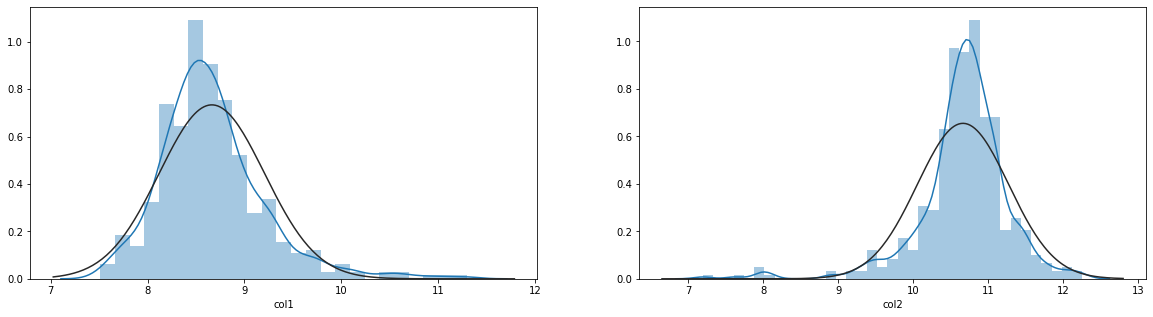

In [894]:

fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.distplot(xtrain['col1'],ax=ax[0],fit=norm)
sns.distplot(xtrain['col2'],fit=norm)

## NOW ALMOST FOLLOWING THE NORMAL CURVE

# LOGISTIC REGRESSION

In [895]:
## since we have to only predict 1 and 0
## we can use logistic reg

lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred1=lg.predict(xtest)

print('accuracy is ', accuracy_score(ypred1,ytest))


## model has become comparitively good

accuracy is  0.8378378378378378


# SUPPORT VECTOR MACHINE

In [896]:
model=SVC()
model.fit(xtrain,ytrain)
ypred2=model.predict(xtest)

print('accuracy is ', accuracy_score(ypred2,ytest))

accuracy is  0.7189189189189189


# DECISION TREE

In [897]:
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred3=model.predict(xtest)

print('accuracy is ', accuracy_score(ypred3,ytest))

accuracy is  0.7297297297297297


# KNN

In [898]:
model=KNeighborsClassifier()
model.fit(xtrain,ytrain)
ypred4=model.predict(xtest)

print('accuracy is ', accuracy_score(ypred4,ytest))

accuracy is  0.7297297297297297


In [899]:
newdata.describe()

## see in some cols lke col1 and col2
## mean and max valuess are tooooo high

## so it means outliers are there

## so lets remove the outliers

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,col1,col2,Loan_Status
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.00000,429.000000,429.000000,429.000000
mean,0.827506,0.668998,0.766900,0.783217,0.137529,0.850816,1.04662,7029.162984,49805.609337,0.673660
std,0.378250,0.471123,1.019311,0.412535,0.344807,0.356686,0.77500,6905.298131,27812.172102,0.469421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1830.000000,1332.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,4166.000000,34560.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000,5398.000000,45360.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,2.00000,7451.000000,57960.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.00000,81000.000000,210000.000000,1.000000


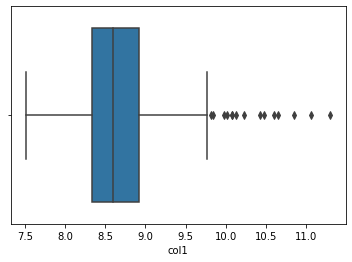

In [900]:
sns.boxplot(xtrain['col1'])

## has outliers


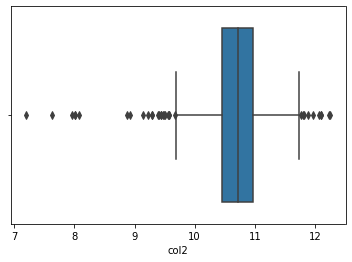

In [901]:
sns.boxplot(xtrain['col2'])

## has outliers

# removing outliers

In [902]:
threshold=0.02

### the lesser the threshold, more the values get remove
## go on checking the diff values of the threshold and see which value suites best
col2_outlierstrain=xtrain['col2']
col2_outlierstest=xtest['col2']

q25train=np.percentile(col2_outlierstrain,25)
q75train=np.percentile(col2_outlierstrain,75)

iqr= q75train - q25train

cutoff= iqr * threshold

lowercut= q25train - cutoff
uppercut = q75train + cutoff

## lowercut and uppercut are like boundries for the extreme points for the values
## beyond which values will be deleted

outliers=[x for x in col2_outlierstrain if x<lowercut or x>uppercut]
data_outliers=pd.concat([xtrain,ytrain],axis=1)

data_outlierstrain = data_outliers.drop(data_outliers[(data_outliers['col2'] > uppercut) | (data_outliers['col2'] < lowercut)].index)

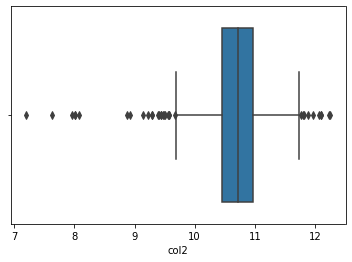

In [903]:
sns.boxplot(xtrain['col2'])

## outliers are there for col2

In [904]:
## same for col1
threshold=0.1

col1_outlierstrain=xtrain['col1']

q25train=np.percentile(col1_outlierstrain,25)
q75train=np.percentile(col1_outlierstrain,75)

iqr=q75train - q25train

cutoff= iqr * threshold

lowercut= q25train - cutoff
uppercut = q75train + cutoff

## lowercut and uppercut are like boundries for the extreme points for the values
## beyond which values will be deleted

outliers=[x for x in col1_outlierstrain if x<lowercut or x>uppercut]
data_outliers=pd.concat([xtrain,ytrain],axis=1)

data_outlierstrain = data_outliers.drop(data_outliers[(data_outliers['col1'] > uppercut) | (data_outliers['col2'] < lowercut)].index)

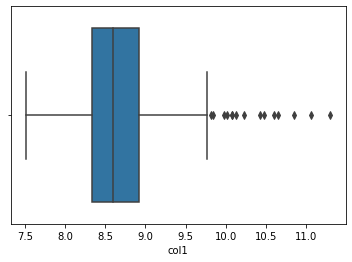

In [905]:
sns.boxplot(xtrain['col1'])

## almost perfect fit

In [906]:
## same for cols in xtest 
## same for col1

threshold=0.002
col1_outlierstest=xtest['col1']

q25test=np.percentile(col1_outlierstest,25)
q75test=np.percentile(col1_outlierstest,75)

iqr=q75test - q25test

cutoff= iqr * threshold

lowercut= q25test - cutoff
uppercut = q75test + cutoff

## lowercut and uppercut are like boundries for the extreme points for the values
## beyond which values will be deleted

outliers=[x for x in col1_outlierstest if x<lowercut or x>uppercut]
data_outliers=pd.concat([xtest,ytest],axis=1)

data_outlierstest = data_outliers.drop(data_outliers[(data_outliers['col1'] > uppercut) | (data_outliers['col1'] < lowercut)].index)

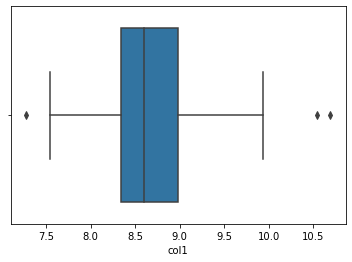

In [907]:
sns.boxplot(xtest['col1'])

## outliers are there for col2

In [908]:
## same for cols in xtest 
## same for col2

threshold=0.1
col2_outlierstest=xtest['col2']

q25test=np.percentile(col2_outlierstest,25)
q75test=np.percentile(col2_outlierstest,75)

iqr=q75test - q25test

cutoff= iqr * threshold

lowercut= q25test - cutoff
uppercut = q75test + cutoff

## lowercut and uppercut are like boundries for the extreme points for the values
## beyond which values will be deleted

outliers=[x for x in col1_outlierstest if x<lowercut or x>uppercut]
data_outliers=pd.concat([xtest,ytest],axis=1)

data_outlierstest = data_outliers.drop(data_outliers[(data_outliers['col2'] > uppercut) | (data_outliers['col2'] < lowercut)].index)

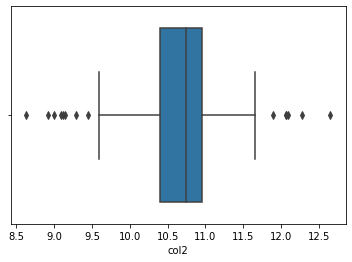

In [909]:
sns.boxplot(xtest['col2'])

## perfect fit for this column

In [910]:
## almost all the outliers are being removed
## lets move on using various algos

In [911]:
xtrain=data_outlierstrain.drop('Loan_Status',axis=1)
ytrain=data_outlierstrain['Loan_Status']

xtest=data_outlierstest.drop('Loan_Status',axis=1)
ytest=data_outlierstest['Loan_Status']

# LOGISTIC REGRESSION

In [912]:
## since we have to only predict 1 and 0
## we can use logistic reg

lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred1=lg.predict(xtest)

print('accuracy is ', accuracy_score(ypred1,ytest))


## model has become comparitively good

accuracy is  0.8712871287128713


# SUPPORT VECTOR MACHINE

In [913]:
model=SVC()
model.fit(xtrain,ytrain)
ypred2=model.predict(xtest)

print('accuracy is ', accuracy_score(ypred2,ytest))


## model improved after removing outliers

accuracy is  0.7623762376237624


# DECISION TREE

In [914]:
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred3=model.predict(xtest)

print('accuracy is ', accuracy_score(ypred3,ytest))


## slightly model improved

accuracy is  0.7227722772277227


# KNN

In [915]:
model=KNeighborsClassifier()
model.fit(xtrain,ytrain)
ypred4=model.predict(xtest)

print('accuracy is ', accuracy_score(ypred4,ytest))


## improved a lot

accuracy is  0.801980198019802


# RANDOM FOREST

In [916]:
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred4=model.predict(xtest)

print('accuracy is ', accuracy_score(ypred4,ytest))

accuracy is  0.8613861386138614


# LOGISTIC REGRESSION IS THE BEST ONE FOR PREDICTION LOAN STATUS APPROVAL

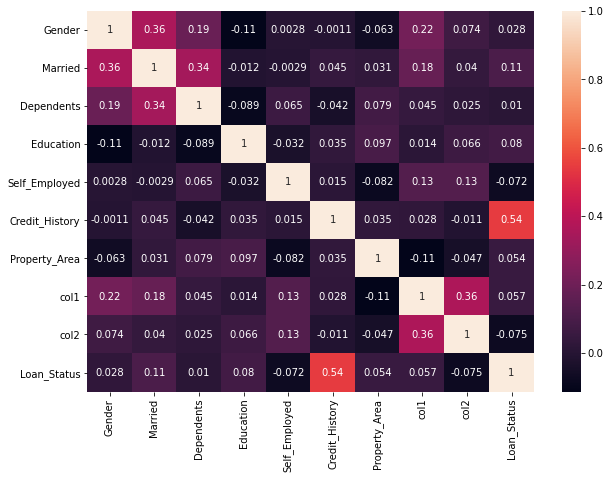

In [917]:
data_corr = pd.concat([xtrain, ytrain], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [918]:
## just credit history seems to be important one
## rest all varibales are just hanging in there in the dataset

In [919]:
## lets see just by removing self employed  and see the model prediction

## but gemder and married have some strong relationship
## so lets remove one of them also

In [920]:
xtrain.drop(['Self_Employed','Gender'],axis=1,inplace=True)
xtest.drop(['Self_Employed','Gender'],axis=1,inplace=True)

# LOGISTIC REGRESSION

In [921]:
## since we have to only predict 1 and 0
## we can use logistic reg

lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred1=lg.predict(xtest)

print('accuracy is ', accuracy_score(ypred1,ytest))



accuracy is  0.8712871287128713


# SUPPORT VECTOR MACHINE

In [922]:
model=SVC()
model.fit(xtrain,ytrain)
ypred2=model.predict(xtest)

print('accuracy is ', accuracy_score(ypred2,ytest))



accuracy is  0.7623762376237624


# DECISION TREE

In [923]:
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred3=model.predict(xtest)

print('accuracy is ', accuracy_score(ypred3,ytest))




accuracy is  0.7029702970297029


# KNN

In [924]:
model=KNeighborsClassifier()
model.fit(xtrain,ytrain)
ypred4=model.predict(xtest)

print('accuracy is ', accuracy_score(ypred4,ytest))




accuracy is  0.8316831683168316


# RANDOM FOREST

In [925]:
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred4=model.predict(xtest)

print('accuracy is ', accuracy_score(ypred4,ytest))

## model improved

accuracy is  0.8316831683168316


In [926]:
## if u remove col2 and dependents also
## model accuracy is detrriorating



# follow all the above steps on test sample also and predict the answer